## BB84 Algorithm

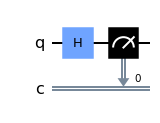

In [1]:
%matplotlib inline
from qiskit import *                      # importing all libraries of Qiskit 
from qiskit.visualization import *        # importing the visualization libraries
from qiskit.tools.monitor import *

circ_random = QuantumCircuit(1,1)         # making a Quantum Circuit with 1 qubit and 1 classical channel
circ_random.h(0)                          # applying an Hadamard gate on the Qubit

circ_random.measure(range(1),range(1))    # measuring the qubit

circ_random.draw(output='mpl')            # drawing the Quantum circuit


In [2]:
n = 100                                                       # length of the message string alice will send

backend = Aer.get_backend('qasm_simulator')                    # making the QASM simulator as the backend
job = execute(circ_random, backend, shots =n , memory = True)  # running the circuit to get random 100 bits
bits_alice =[int(q) for q in job.result().get_memory()]        # making them as the alice bits
print(bits_alice)

[1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1]


In [3]:
job = execute(circ_random, backend, shots = n, memory =True)   # setting  memory = True to save all the data
basis_alice = [int(q) for q in job.result().get_memory()]      # making the second set as Alice Base
print(basis_alice)

[0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0]


In [4]:
job = execute(circ_random, backend, shots = n, memory =True)
basis_bob = [int(q) for q in job.result().get_memory()]
print(basis_bob)

[0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]


In [6]:

bits_bob = []

for i in range(n):
    circ_send = QuantumCircuit(1,1)
    if bits_alice[i]:   # alice has to send 1
        circ_send.x(0)
    if basis_alice[i]:   # alice codes in Hadmaard basis
        circ_send.h(0)
        
        
        # alice sends the qubits
    if basis_bob[i]:      # bob has to measure in Hadamard basis
        circ_send.h(0)
        
    circ_send.measure(0,0)
    
    job = execute(circ_send, backend, shots = 1, memory = True)
    bits_bob.append( int(job.result().get_memory()[0]))
    
    
print(bits_bob)

[1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1]


In [7]:
# bob tell alice the bases he use and vice versa

key = []

for i in range(n):
    if basis_alice[i] ==  basis_bob[i]:
        key.append(bits_bob[i])
        
print("Key Length", len(key))
print(key)

Key Length 54
[1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1]


Here we can see that the more than 50% of the bits were correctly measured by Bob and will serve as the key for further messages.